In [44]:
#### Read Inputs #### 

import pandas as pd
import numpy as np
import random
import math

output = pd.read_csv('0-9days.csv')
output = output.rename(columns={"loss_value": "Money spent + Loss from undetected scams", "gain_value": "Value of detected scams"})

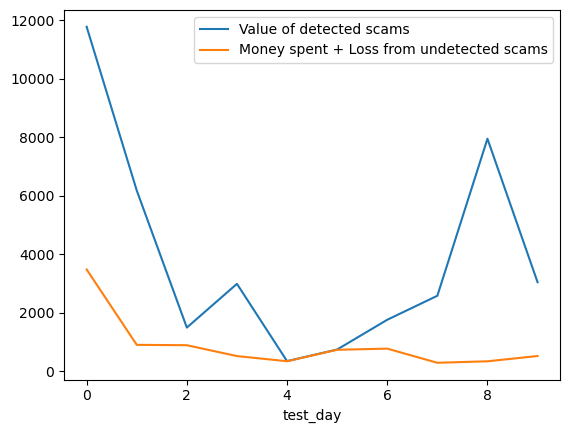

In [46]:
plot = output.plot(x = "test_day", y = ["Value of detected scams", "Money spent + Loss from undetected scams"])

In [49]:
counts = output.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df

,Transaction Priority,Investigation Success Rate
0,1,0.338983
1,2,0.187500
2,3,0.782609
3,4,0.625000
